# Extended Graham scan algorithm

Use the cell below for all python code needed to realise the extended Graham scan algorithm (including any auxiliary data structures and functions you might need). The `extendedgrahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [1]:
# Extended Graham-scan. Optimised with the Akl-Toussaint heuristic
import math

global averageCase
averageCase = True #DO NOT CHANGE THIS, to generate random/worst case data please change methods called below

# calculate the polar angle of the line p0p1
def polarAngle(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return math.atan2(dy, dx)


# calculate the distance squared between p0 and p1
def distance(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return dy ** 2 + dx ** 2


# 2D determinent for three points
def determinant(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])  
        


def insertionSort(list1, left, right): 
    for i in range(left + 1, right + 1): 
        j = i 
        while j > left and polarAngle(list1[j]) < polarAngle(list1[j - 1]): 
            list1[j], list1[j - 1] = list1[j - 1], list1[j] 
            j -= 1
            
def merge(list1, leftIndex, middleIndex, rightIndex): 
    n1 =  middleIndex - leftIndex + 1
    n2 = rightIndex - middleIndex
    left, right = [], [] 
    for i in range(0, n1): 
        left.append(list1[leftIndex + i]) 
    for i in range(0, n2): 
        right.append(list1[middleIndex + 1 + i]) 
    i = 0
    j = 0
    k = leftIndex
    while i < n1 and j < n2: 
        if polarAngle(left[i]) <= polarAngle(right[j]): 
            list1[k] = left[i] 
            i += 1
        else: 
            list1[k] = right[j] 
            j += 1
        k += 1
    while i < n1: 
        list1[k] = left[i] 
        k += 1
        i += 1
    while j < n2: 
        list1[k] = right[j] 
        k += 1
        j += 1

#timSort uses two commonly implemented algorithms: merge sort and insertion sort
def timSort(list1): 
    #The min run size is set to 32, so that the size of the data is close to a power of two, when we divide the size of a list by MIN_RUN
    MIN_RUN = 32
    for start in range(0, len(list1), MIN_RUN): 
        end = min(start + MIN_RUN - 1, len(list1) - 1) 
        insertionSort(list1, start, end) 
    size = MIN_RUN
    while size < len(list1) : 
        for left in range(0, len(list1), size * 2): 
            middle = min(len(list1) - 1, left + size - 1) 
            right = min((left + size * 2 - 1), (len(list1) - 1)) 
  
            merge(list1, left, middle, right)
        size *= 2  

#function checks that a point is within the quadrilateral
def inQuad(l, t, r, b, p):
    #all sides of the quadrilateral are treated as vectors
    #when a point makes an anticlockwise turn with the vector then it is considered to be outside the quadrilateral
    if determinant(l, t, p) < 0  and determinant(t, r, p) < 0 and determinant(r, b, p) < 0 and determinant(b, l, p) < 0:
        return True
    return False

# Alk-Toussaint heuristic
# find the maximum and minimum points xmax, xmin, ymax and ymin
# these form a convex quadrilateral
# points inside can be ignored, points outside may be in the convex hull. 
# reference: http://www-cgrl.cs.mcgill.ca/~godfried/publications/fast.convex.hull.algorithm.pdf

def akl_toussaint(inputSet):
    #collects the four boundary points on the hull from the map of points
    #most right point
    xmax = max(inputSet, key=lambda p: p[0])
    #most left point
    xmin = min(inputSet, key=lambda p: p[0])
    #top point
    ymax = max(inputSet, key=lambda p: p[1])
    #bottom point
    ymin = min(inputSet, key=lambda p: p[1])    
    
    newSet = []
    
    for point in inputSet:
        #only adds points outside of the convex quadrilateral
        if not inQuad(xmin, ymax, xmax, ymin, point):
            newSet.append(point)
    return newSet

#finds the bottom left point
def LowestLeftMost(inputSet):
    MIN = 0
    for i in range(0, len(inputSet)):
        #first finds the lowest point in the input set
        if inputSet[i][1] < inputSet[MIN][1]:
            MIN = i
        # when two points have the same y coordinate
        #we must compare x coordinates and the one with the lowest x coordinate is the minimum point
        if inputSet[i][1] == inputSet[MIN][1]:
            if inputSet[i][0] < inputSet[MIN][0]:
                MIN = i     
    return inputSet[MIN]

def extendedgrahamscan(inputSet):
    global llmPoint
    if averageCase == True:
        inputSet = akl_toussaint(inputSet)
    llmPoint = LowestLeftMost(inputSet)
    #sort the list of points based on polar angle
    timSort(inputSet)
    sortedPoints = inputSet
    #the hull must have the lowest leftmost point
    #sortedPoints[0] is used to make an initial comparison later on
    outputSet = [llmPoint, sortedPoints[0]]
    for s in sortedPoints[1:]:
        #when the orientation is clockwise or the points are co-linear it should pop the last item from the stack
        while determinant(outputSet[-2], outputSet[-1], s) <= 0 :
            outputSet.pop()
            if len(outputSet) < 2: #Check to make sure llm point is not deleted
                break
        outputSet.append(s)
    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [2]:
import random

#code for random data generation
def generateRandomInputSet(N):
    global averageCase
    averageCase = True
    inputSet = []
    for i in range(0, N):
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        inputSet.append([x, y])
    return inputSet

#code for worst case data generation
#this occurs when there are no points inside the quadrilateral(i.e points on a circle)
def generateWorstCaseInputSet(N):
    global averageCase
    averageCase = False
    inputSet = []
    for i in range(0, N):
        x = random.randint(0, 32767)
        y = random.randint(0, 32767)
        inputSet.append([x, y])
    return inputSet

Use the cell below for all python code needed to test the `extendedgrahamscan()` function on the data generated above.

In [3]:
import timeit

def testGivenPoints(numbersToTest, nof_repeats):
    print("No. of points", "\t Time taken \t\t\t Points on hull")
    for numberToTest in numbersToTest:
        sum_all_times = 0
        sum_outputset_size = 0
        for i in range(0,nof_repeats):
            inputSet = generateRandomInputSet(numberToTest)
            #inputSet = generateWorstCaseInputSet(numberToTest)
            start_time = timeit.default_timer()
            outputSet = extendedgrahamscan(inputSet)
            end_time = timeit.default_timer()
            sum_all_times += end_time - start_time
            sum_outputset_size += len(outputSet)

        sum_all_times = sum_all_times / nof_repeats
        sum_outputset_size = sum_outputset_size / nof_repeats
        print(numberToTest, "      \t", sum_all_times, "     \t", sum_outputset_size)

#Main code to run tests for each given number of points
NOF_REPEATS = 3
numbersToTest = [100,200,500,1000,2000,5000,10000,15000,20000]
testGivenPoints(numbersToTest, NOF_REPEATS)

No. of points 	 Time taken 			 Points on hull
100       	 0.0009510023333333765      	 10.666666666666666
200       	 0.0025858040000000435      	 13.333333333333334
500       	 0.004957213333333321      	 15.333333333333334
1000       	 0.011489101333333215      	 15.666666666666666
2000       	 0.02528068699999997      	 19.333333333333332
5000       	 0.06422313100000003      	 23.0
10000       	 0.12018289100000001      	 24.333333333333332
15000       	 0.1845513853333333      	 26.333333333333332
20000       	 0.2743120659999998      	 25.666666666666668


In [4]:
inputSet = generateRandomInputSet(100)
#inputSet = generateWorstCaseInputSet(100)
outputSet = extendedgrahamscan(inputSet)

*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

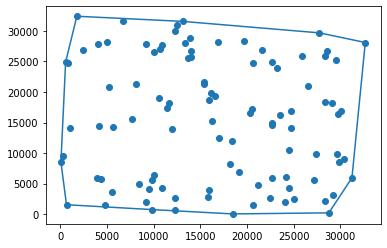

In [5]:
import matplotlib.pyplot as plt
# inputSet and outputSet should have been defined above. 
plt.figure()
#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys)

plt.show() 